

```
#importing the dataset

```



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/heart_disease_uci.csv")

In [3]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
data.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalch      119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [6]:
data.shape

(920, 16)

# b. Get information about dataset (mean, max, min, quartiles etc.)

In [7]:
data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
list_num = []
list_obj = []
for i in data.columns:
  if(data[i].dtype == object):
    list_obj.append(i)
    
  
  else:
    list_num.append(i)


In [9]:
#fill the null values
for i in data.columns:
  if(data[i].dtype == 'object'):

    data[i] = data[i].fillna(data[i].mode()[0])
    
    

  else:
      data[i] = data[i].fillna(data[i].median()) 


In [10]:
data.duplicated().sum()

0

In [11]:
data2 = data

In [12]:
dict1 = {0:0,1:1,2:1,3:1,4:1}

data2['num']= data2['num'].map(dict1)

#lets apply one hot encoding

In [13]:
#data_dummy= pd.get_dummies(data,drop_first=True)
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

data2[list_obj] = data2[list_obj].apply(lb.fit_transform)


In [14]:
data2.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [15]:
#dict2 = {True:1,False:0}
#data_dummy['fbs']= data_dummy['fbs'].map(dict2)
#data_dummy['exang']= data_dummy['exang'].map(dict2)

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int64  
 15  num       920 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 115.1 KB


In [17]:
data2.describe()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,0.789130,1.238043,0.782609,131.995652,199.908696,0.150000,0.990217,137.692391,0.366304,0.853261,1.152174,0.227174,1.158696,0.553261
std,265.725422,9.424685,0.408148,1.130673,0.956350,18.451300,109.040171,0.357266,0.631863,25.145235,0.482056,1.058049,0.516007,0.628936,0.483493,0.497426
min,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,0.000000,0.000000,120.000000,177.750000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,460.500000,54.000000,1.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,690.250000,60.000000,1.000000,2.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,0.000000,1.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [18]:
data2.corr()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,1.000000,0.239301,0.280053,0.949062,-0.189430,0.039382,-0.370721,0.148983,0.479012,-0.428727,0.166239,0.014034,-0.305000,-0.385881,-0.169764,0.356086
age,0.239301,1.000000,0.056889,0.235076,-0.076519,0.230784,-0.086010,0.219915,-0.006652,-0.349715,0.160910,0.233550,-0.077087,0.219413,0.101109,0.282700
sex,0.280053,0.056889,1.000000,0.285734,-0.125933,-0.002145,-0.194029,0.075370,0.072160,-0.174590,0.155204,0.090794,-0.105805,-0.037847,0.076023,0.307284
dataset,0.949062,0.235076,0.285734,1.000000,-0.150334,0.008343,-0.410777,0.170110,0.460189,-0.373492,0.129326,0.012767,-0.297152,-0.371451,-0.146806,0.295696
cp,-0.189430,-0.076519,-0.125933,-0.150334,1.000000,-0.023980,0.065089,0.006370,-0.070150,0.290613,-0.360513,-0.177489,0.113415,-0.046250,-0.097099,-0.385077
trestbps,0.039382,0.230784,-0.002145,0.008343,-0.023980,1.000000,0.089484,0.143709,0.010263,-0.104747,0.153835,0.161217,-0.050446,0.039092,0.066675,0.101273
chol,-0.370721,-0.086010,-0.194029,-0.410777,0.065089,0.089484,1.000000,0.089316,-0.199594,0.226047,-0.033914,0.047454,0.033221,0.152514,-0.052708,-0.228976
fbs,0.148983,0.219915,0.075370,0.170110,0.006370,0.143709,0.089316,1.000000,0.025788,-0.026472,-0.003475,0.034112,-0.070830,0.061260,-0.005670,0.108071
restecg,0.479012,-0.006652,0.072160,0.460189,-0.070150,0.010263,-0.199594,0.025788,1.000000,-0.161818,0.026067,-0.047235,-0.128925,-0.306549,-0.169442,0.058783
thalch,-0.428727,-0.349715,-0.174590,-0.373492,0.290613,-0.104747,0.226047,-0.026472,-0.161818,1.000000,-0.354173,-0.149401,0.289251,0.038207,-0.054336,-0.381864


In [19]:
#B) Data Visualization:
#a. Visualize the number of patients having a heart disease and not having a heart disease.
#b. Visualize the age and weather patient has disease or not
#c. Visualize correlation between all features using a heat map

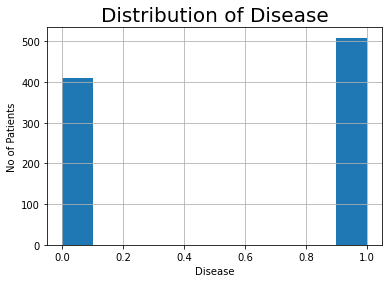

In [20]:
#a. Visualize the number of patients having a heart disease and not having a heart disease.
data2.num.hist()
plt.title("Distribution of Disease", fontsize=20)
plt.xlabel("Disease")
plt.ylabel("No of Patients")
plt.show()

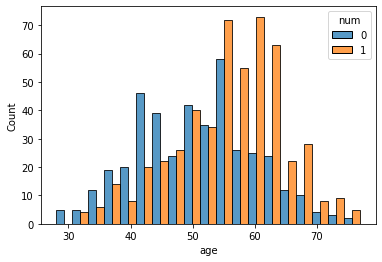

In [21]:
#b. Visualize the age and weather patient has disease or not
sns.histplot(x="age", data=data,hue='num',multiple='dodge')
plt.show()

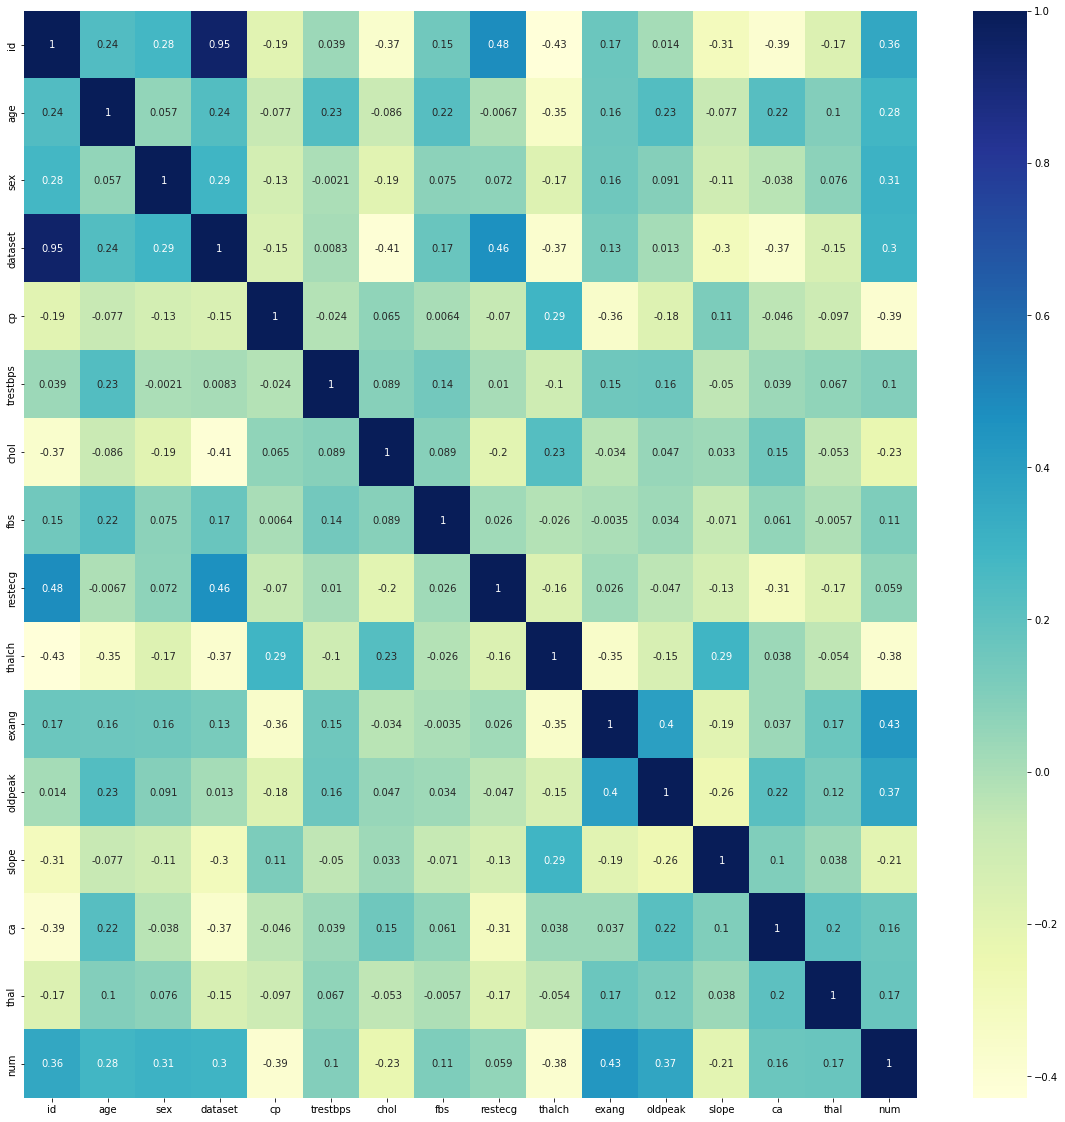

In [22]:
#c. Visualize correlation between all features using a heat map
plt.figure(figsize=(20,20))
sns.heatmap(data2.corr(),cmap="YlGnBu", annot=True)

## C) Logistic Regression:

In [23]:

#a. Build a simple logistic regression model
#i. Divide the dataset in 70:30 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and get the accuracy score

In [24]:
X = data2.drop(['num','age','ca','thal',"dataset"],axis=1)
y = data2['num']

In [25]:
X.head()

,id,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
0,1,1,3,145.0,233.0,1,0,150.0,0,2.3,0
1,2,1,0,160.0,286.0,0,0,108.0,1,1.5,1
2,3,1,0,120.0,229.0,0,0,129.0,1,2.6,1
3,4,1,2,130.0,250.0,0,1,187.0,0,3.5,0
4,5,0,1,130.0,204.0,0,0,172.0,0,1.4,2


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0 )

In [27]:
#lets standardize our data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [28]:
X_train_sc.shape, y_train.shape

((644, 11), (644,))

In [29]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_sc,y_train)
y_pred = lr.predict(X_test_sc)

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

In [31]:
accuracy_score(y_test,y_pred)

0.782608695652174

In [32]:
confusion_matrix(y_pred,y_test)

array([[ 95,  25],
       [ 35, 121]])

#D) Decision Tree:

In [33]:
#a. Build a decision tree model
#i. Divide the dataset in 70:30 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and calculate the accuracy

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_sc,y_train)
y_pred = dt.predict(X_test_sc)

In [35]:
accuracy_score(y_test,y_pred)

0.8115942028985508

In [36]:
confusion_matrix(y_pred,y_test)

array([[105,  27],
       [ 25, 119]])

In [37]:
#E) Random Forest:
#a. Build a Random Forest model
#i. Divide the dataset in 70:30 ratio
#ii. Build the model on train set and predict the values on test set
#iii. Build the confusion matrix and calculate the accuracy

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_sc,y_train)
y_pred = rfc.predict(X_test_sc)

In [39]:
accuracy_score(y_test,y_pred)

0.8442028985507246

In [40]:
confusion_matrix(y_pred,y_test)

array([[103,  16],
       [ 27, 130]])

## Evalution

In [41]:
acc = []
pre = []
re = []
models = [rfc,dt,lr]
models_name = ['RandomForestClassifier','DecisionTreeClassifier','LogisticRegression']

for i in models:
  i.fit(X_train_sc,y_train)
  y_pred= i.predict(X_test_sc)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)

  acc.append(accuracy)
  pre.append(precision)
  re.append(recall)

In [42]:
m1 = pd.DataFrame()
m1['Models']=models_name
m1['Accuracy']= acc
m1['Precision']= pre
m1['Recall']= re

In [43]:
m1

,Models,Accuracy,Precision,Recall
0,RandomForestClassifier,0.855072,0.844156,0.890411
1,DecisionTreeClassifier,0.826087,0.840278,0.828767
2,LogisticRegression,0.782609,0.775641,0.828767


*Random Forest giving the best accuracy 85%*